데이터 클래스 비율이 너무 차이가 나면(대략 1000배 이상), 단순이 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다.

- 정확도(accuracy)는 높아도 재현율(recall-rate)이 떨어지는 문제가 발생

- 해결 방법
    - 다수 클래스 일부만 사용하는 **언더 샘플링**
    - 소수 클래스 데이터를 증가시키는 **오버 샘플링**
    - 둘다 하는 **복합 샘플링**


In [1]:
from imblearn.under_sampling import *

언더샘플링

- RandomUnderSampler: random under-sampling method
- TomekLinks: Tomek’s link method
- CondensedNearestNeighbour: condensed nearest neighbour method
- OneSidedSelection: under-sampling based on one-sided selection method
- EditedNearestNeighbours: edited nearest neighbour method
- NeighbourhoodCleaningRule: neighbourhood cleaning rule


In [12]:
from imblearn.over_sampling import *

오버 샘플링
- RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique

복합

- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek


### tips 데이터에 적용

In [44]:
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.svm import SVC

%matplotlib inline
tips=sns.load_dataset('tips')

In [45]:
tips['sex'] = tips['sex'].apply(lambda x: 1 if x == 'Male' else 0).astype('float64')
tips['smoker'] = tips['smoker'].apply(lambda x: 1 if x == 'Yes' else 0).astype('float64')
tips['time'] = tips['time'].apply(lambda x: 1 if x == 'Dinner' else 0).astype('float64')
tips['day'] = tips['day'].apply(lambda x: 0 if x == 'Thur' else 1 if x =='Fri' else 2 if x=='Sat' else 3).astype('float64')

In [46]:
# tips['upper3'] = tips['tip'].apply(lambda x: 1 if x >3 else 0)
tips['upper5'] = tips['tip'].apply(lambda x: 1 if x >5 else 0)
tips['target'] = tips['tip'].apply(lambda x: 'upper5' if x>5 else 'upper3' if x>3 else 'others')

In [97]:
y = tips['upper5']
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]

---

In [98]:
from sklearn.preprocessing import StandardScaler

X = X.iloc[:,[0,-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y==0], X[y==0], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y==1], X[y==1], c='g', marker='o', label='1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

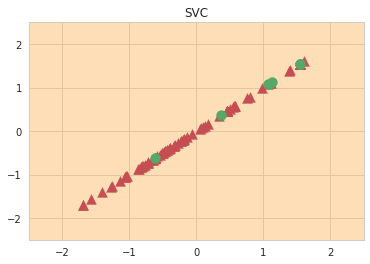

In [99]:
model = SVC(kernel="linear").fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "SVC")

In [100]:
from imblearn.under_sampling import *
X1, y1 = RandomUnderSampler(random_state=0).fit_sample(X0, y0)

In [30]:
model = SVC(kernel="rbf").fit(X1, y1)
cv = KFold(3)
print("accuracy:",cross_val_score(model, X_test, y_test, scoring="accuracy", cv=cv).mean())
print("recall:",cross_val_score(model, X_test, y_test, scoring="recall", cv=cv).mean())
# print("roc_auc:",cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=cv).mean())
print("f1:",cross_val_score(model, X_test, y_test, scoring="f1", cv=cv).mean())

accuracy: 0.934126984126984
recall: 0.16666666666666666
f1: 0.2222222222222222


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
X1, y1 = TomekLinks(random_state=0).fit_sample(X0, y0)

In [32]:
model = SVC(kernel="rbf").fit(X1, y1)
cv = KFold(3)
print("accuracy:",cross_val_score(model, X_test, y_test, scoring="accuracy", cv=cv).mean())
print("recall:",cross_val_score(model, X_test, y_test, scoring="recall", cv=cv).mean())
# print("roc_auc:",cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=cv).mean())
print("f1:",cross_val_score(model, X_test, y_test, scoring="f1", cv=cv).mean())

accuracy: 0.934126984126984
recall: 0.16666666666666666
f1: 0.2222222222222222


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
X1, y1 = OneSidedSelection(random_state=0).fit_sample(X0, y0)

In [34]:
model = SVC(kernel="rbf").fit(X1, y1)
cv = KFold(3)
print("accuracy:",cross_val_score(model, X_test, y_test, scoring="accuracy", cv=cv).mean())
print("recall:",cross_val_score(model, X_test, y_test, scoring="recall", cv=cv).mean())
# print("roc_auc:",cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=cv).mean())
print("f1:",cross_val_score(model, X_test, y_test, scoring="f1", cv=cv).mean())

accuracy: 0.934126984126984
recall: 0.16666666666666666
f1: 0.2222222222222222


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from imblearn.over_sampling import *
X1, y1 = SMOTE(random_state=0, ratio='minority').fit_sample(X0, y0)

In [36]:
model = SVC(kernel="rbf").fit(X1, y1)
cv = KFold(3)
print("accuracy:",cross_val_score(model, X_test, y_test, scoring="accuracy", cv=cv).mean())
print("recall:",cross_val_score(model, X_test, y_test, scoring="recall", cv=cv).mean())
# print("roc_auc:",cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=cv).mean())
print("f1:",cross_val_score(model, X_test, y_test, scoring="f1", cv=cv).mean())

accuracy: 0.934126984126984
recall: 0.16666666666666666
f1: 0.2222222222222222


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from imblearn.combine import *
X1, y1 = SMOTEENN(random_state=0).fit_sample(X0, y0)

In [38]:
model = SVC(kernel="rbf").fit(X1, y1)
cv = KFold(3)
print("accuracy:",cross_val_score(model, X_test, y_test, scoring="accuracy", cv=cv).mean())
print("recall:",cross_val_score(model, X_test, y_test, scoring="recall", cv=cv).mean())
# print("roc_auc:",cross_val_score(model, X_test, y_test, scoring="roc_auc", cv=cv).mean())
print("f1:",cross_val_score(model, X_test, y_test, scoring="f1", cv=cv).mean())

accuracy: 0.934126984126984
recall: 0.16666666666666666
f1: 0.2222222222222222


/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


샘플이 적으면 의미없는 짓인듯 싶다.